In [ ]:
!pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ submodlib

Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for submodlib: filename=submodlib-1.1.5-cp39-cp39-linux_x86_64.whl size=536046 sha256=efebabd733ed7e75b56ee956ed28f82cc68e3a3e73bad4975763f5e998908a62
  Stored in directory: /root/.cache/pip/wheels/0a/14/11/62df6592645e21707f36dfbe513f90548a43c6cd6246b54627
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=45d68d295c0035198927e9cf8aaa0dfdc5a11185c75691a48e74edb2afcaed6e
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built submodlib sklearn


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
groundData = []
repData = []

In [ ]:
with open("/content/gset_1.txt", 'r') as f:
  lines = f.readlines()
  for line in lines:
    l = line.strip().split(",")
    x = float(l[0])
    y = float(l[1])
    groundData.append([x,y])
groundData = np.array(groundData)

In [ ]:
with open("/content/rep.txt", 'r') as f:
  lines = f.readlines()
  for line in lines:
    l = line.strip().split(",")
    x = float(l[0])
    y = float(l[1])
    repData.append([x,y])
repData = np.array(repData)

In [ ]:
rep_x = [x[0] for x in repData]
rep_y = [x[1] for x in repData]

gset_x = [x[0] for x in groundData]
gset_y = [x[1] for x in groundData]

#Ground Set and Rep set

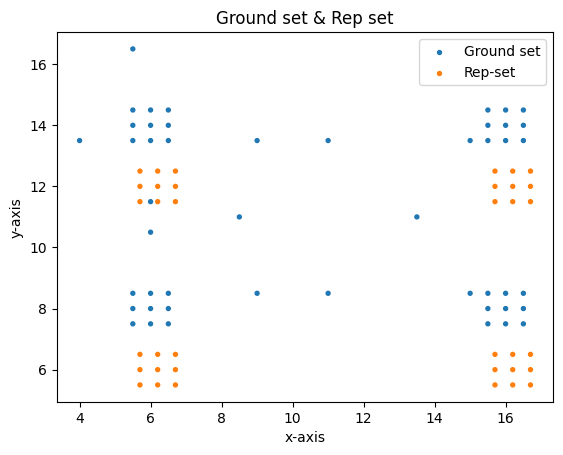

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
plt.scatter(repData[:,0], repData[:,1], s=[8]*len(repData))
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Ground set & Rep set")
plt.legend(["Ground set", "Rep-set"])
plt.savefig("ground_rep_set.png")
plt.show()
plt.tight_layout()
plt.clf()

# Facility Location

In [ ]:
from submodlib import FacilityLocationFunction
objFL = FacilityLocationFunction(n=len(groundData), data=groundData, separate_rep= True, n_rep = len(repData), data_rep = repData, mode="dense", metric="euclidean")
greedyList = objFL.maximize(budget=10,optimizer='NaiveGreedy',stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyList = np.array(greedyList)
print(greedyList)

[[4.70000000e+01 7.03394143e+00]
 [3.50000000e+01 5.05913981e+00]
 [3.20000000e+01 3.60340384e+00]
 [1.70000000e+01 3.22801337e+00]
 [3.60000000e+01 1.08960658e-01]
 [1.80000000e+01 1.08960658e-01]
 [3.30000000e+01 1.08960420e-01]
 [1.50000000e+01 5.73816299e-02]
 [3.40000000e+01 1.33326352e-02]
 [3.10000000e+01 1.33326352e-02]]


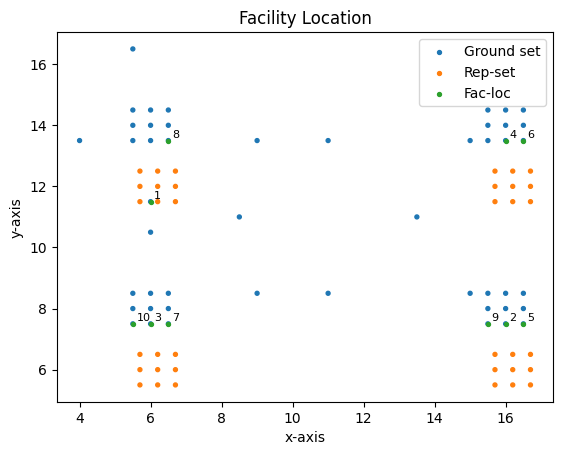

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("Facility Location")

greedyXs = [gset_x[int(x[0])] for x in greedyList]
greedyYs = [gset_y[int(x[0])] for x in greedyList]

ax.scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
ax.scatter(repData[:,0], repData[:,1], s=[8]*len(repData))
ax.scatter(greedyXs, greedyYs, s=8)

for label, element in enumerate(greedyList):
    plt.annotate(label+1, (gset_x[int(element[0])], gset_y[int(element[0])]), (gset_x[int(element[0])]+0.1, gset_y[int(element[0])]+0.1), fontsize=8)
ax.legend(["Ground set", "Rep-set", "Fac-loc"])
fig.savefig("fac_loc.png")
plt.show()
plt.clf()

#Graph Cut λ =0

In [ ]:
from submodlib import GraphCutFunction
objGC = GraphCutFunction(n = len(groundData), mode = 'dense',  data=groundData, separate_rep = True, lambdaVal = 0, data_rep = repData, n_rep = len(repData), metric="euclidean")
greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)

[(47, 7.033941428409889), (35, 5.248506189556792), (46, 5.230022019939497), (32, 5.230022019939497), (33, 5.219324848847464), (36, 5.191547793336213), (34, 4.98342073475942), (31, 4.917666536523029), (29, 4.625462738564238), (27, 4.607349946163595)]


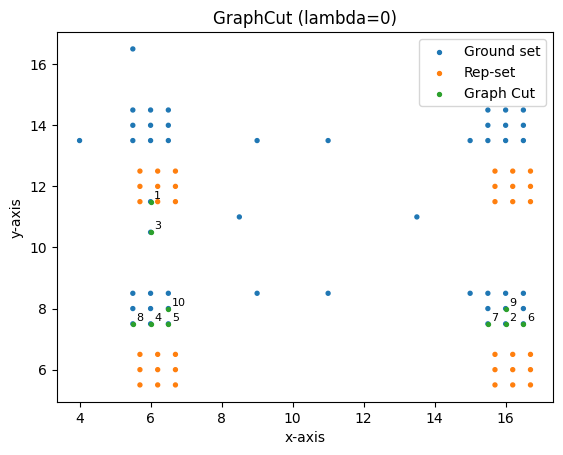

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("GraphCut (lambda=0)")

greedyXs = [gset_x[int(x[0])] for x in greedyList]
greedyYs = [gset_y[int(x[0])] for x in greedyList]

ax.scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
ax.scatter(repData[:,0], repData[:,1], s=[8]*len(repData))
ax.scatter(greedyXs, greedyYs, s=8)

for label, element in enumerate(greedyList):
    plt.annotate(label+1, (gset_x[int(element[0])], gset_y[int(element[0])]), (gset_x[int(element[0])]+0.1, gset_y[int(element[0])]+0.1), fontsize=8)
ax.legend(["Ground set", "Rep-set", "Graph Cut"])
fig.savefig("graph_cut_0.png")
plt.show()
plt.clf()


# GraphCut λ = 3



In [ ]:
from submodlib import GraphCutFunction
objGC = GraphCutFunction(n = len(groundData), mode = 'dense',  data=groundData, separate_rep = True, lambdaVal = 3, data_rep = repData, n_rep = len(repData), metric="euclidean")
greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)

[(47, 4.033941428409889), (35, 2.2210016783792526), (32, 1.3775826490018517), (17, 1.1303897709585726), (15, -1.0544346026144922), (38, -2.086661501787603), (42, -3.3050946621224284), (36, -3.582897698506713), (45, -3.932376338489121), (6, -4.785716091108043)]


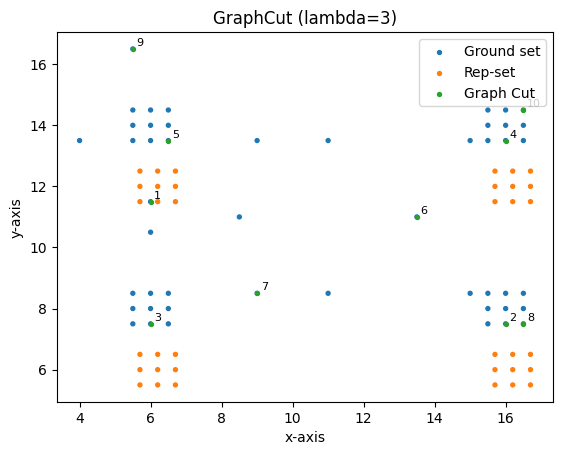

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("GraphCut (lambda=3)")

greedyXs = [gset_x[int(x[0])] for x in greedyList]
greedyYs = [gset_y[int(x[0])] for x in greedyList]

ax.scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
ax.scatter(repData[:,0], repData[:,1], s=[8]*len(repData))
ax.scatter(greedyXs, greedyYs, s=8)

for label, element in enumerate(greedyList):
    plt.annotate(label+1, (gset_x[int(element[0])], gset_y[int(element[0])]), (gset_x[int(element[0])]+0.1, gset_y[int(element[0])]+0.1), fontsize=8)
ax.legend(["Ground set", "Rep-set", "Graph Cut"])
fig.savefig("graph_cut_3.png")
plt.show()
plt.clf()

#GraphCut λ = -3

In [ ]:
from submodlib import GraphCutFunction
objGC = GraphCutFunction(n = len(groundData), mode = 'dense',  data=groundData, separate_rep = True, lambdaVal = -3, data_rep = repData, n_rep = len(repData), metric="euclidean")
greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)

[(47, 10.03394142840989), (46, 11.869206018047407), (14, 11.015028570080176), (15, 15.57982674613595), (13, 18.944643539842218), (8, 22.38315814046655), (9, 26.21028188499622), (7, 29.66744815016864), (2, 31.517540666798595), (3, 34.89863199274987)]


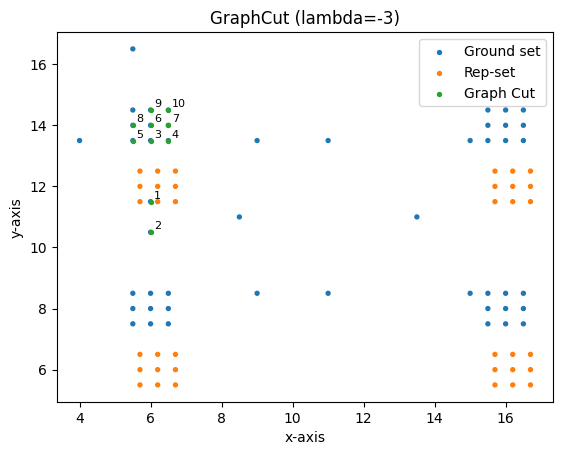

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("GraphCut (lambda=-3)")

greedyXs = [gset_x[int(x[0])] for x in greedyList]
greedyYs = [gset_y[int(x[0])] for x in greedyList]

ax.scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
ax.scatter(repData[:,0], repData[:,1], s=[8]*len(repData))
ax.scatter(greedyXs, greedyYs, s=8)

for label, element in enumerate(greedyList):
    plt.annotate(label+1, (gset_x[int(element[0])], gset_y[int(element[0])]), (gset_x[int(element[0])]+0.1, gset_y[int(element[0])]+0.1), fontsize=8)
ax.legend(["Ground set", "Rep-set", "Graph Cut"])
fig.savefig("graph_cut_minus3.png")
plt.show()
plt.clf()

#Disparity Sum

In [ ]:
from submodlib import DisparitySumFunction
objDS = DisparitySumFunction(n=len(groundData),mode = 'dense',  data=groundData, metric="euclidean")
greedyList = objDS.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)

[(47, 0.0), (36, 0.9963682889938354), (6, 1.9655494093894958), (45, 2.914377808570862), (40, 3.8598334789276123), (31, 4.7889745235443115), (39, 5.711325526237488), (0, 6.47794497013092), (38, 7.407852113246918), (42, 8.133478105068207)]


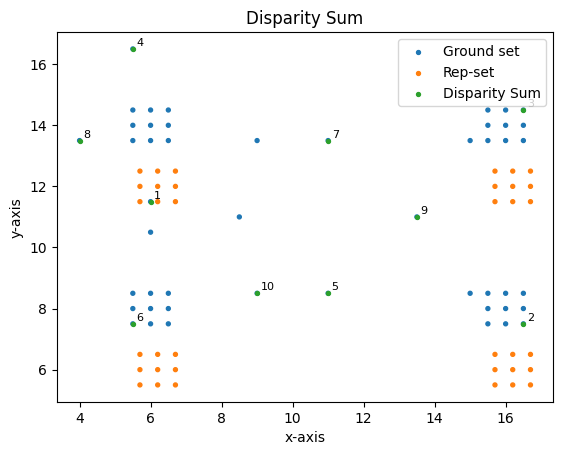

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("Disparity Sum")

greedyXs = [gset_x[int(x[0])] for x in greedyList]
greedyYs = [gset_y[int(x[0])] for x in greedyList]

ax.scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
ax.scatter(repData[:,0], repData[:,1], s=[8]*len(repData))
ax.scatter(greedyXs, greedyYs, s=8)

for label, element in enumerate(greedyList):
    plt.annotate(label+1, (gset_x[int(element[0])], gset_y[int(element[0])]), (gset_x[int(element[0])]+0.1, gset_y[int(element[0])]+0.1), fontsize=8)
ax.legend(["Ground set", "Rep-set", "Disparity Sum"])
fig.savefig("disparity_sum.png")
plt.show()
plt.clf()

#Disparity Min

In [ ]:
from submodlib import DisparityMinFunction
objDM = DisparityMinFunction(n=48, data=groundData, mode="dense", metric="euclidean")
greedyList = objDM.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)

[(47, 0.0), (36, 0.9963682889938354), (4, -0.025511503219604492), (40, -0.031966447830200195), (45, -0.019958198070526123), (39, -0.018702328205108643), (33, -0.03347498178482056), (38, -0.03746861219406128), (0, -0.0724029541015625), (37, -0.03638273477554321)]


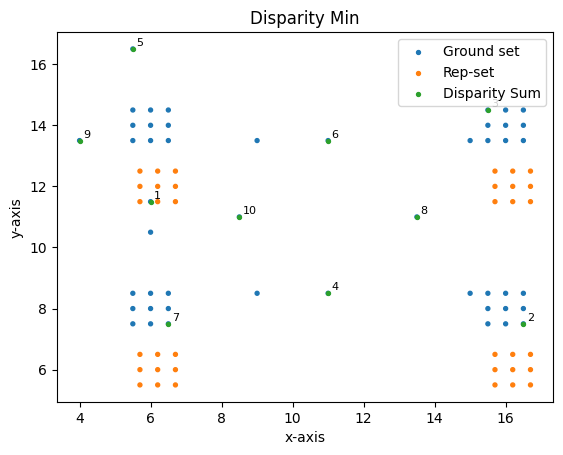

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("Disparity Min")

greedyXs = [gset_x[int(x[0])] for x in greedyList]
greedyYs = [gset_y[int(x[0])] for x in greedyList]

ax.scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
ax.scatter(repData[:,0], repData[:,1], s=[8]*len(repData))
ax.scatter(greedyXs, greedyYs, s=8)

for label, element in enumerate(greedyList):
    plt.annotate(label+1, (gset_x[int(element[0])], gset_y[int(element[0])]), (gset_x[int(element[0])]+0.1, gset_y[int(element[0])]+0.1), fontsize=8)
ax.legend(["Ground set", "Rep-set", "Disparity Sum"])
fig.savefig("disparity_min.png")
plt.show()
plt.clf()

# Part-B



In [ ]:
groundData = []
qsetData = []

In [ ]:
with open("/content/gset_2.txt", 'r') as f:
  lines = f.readlines()
  for line in lines:
    l = line.strip().split(",")
    x = float(l[0])
    y = float(l[1])
    groundData.append([x,y])
groundData = np.array(groundData)

In [ ]:
with open("/content/qset_points.txt", 'r') as f:
  lines = f.readlines()
  for line in lines:
    l = line.strip().split(",")
    x = float(l[0])
    y = float(l[1])
    qsetData.append([x,y])
qsetData = np.array(qsetData)

In [ ]:
queries =[]
with open("/content/qset.txt", 'r') as f:
  lines = f.readlines()
  for line in lines:
    l = line.replace(" ","").strip().split(";")
    qlist =[]
    for i in range(len(l)-1):
      q = l[i].split(",")
      x= float(q[0])
      y= float(q[1])
      qlist.append((x,y))
    queries.append(qlist)
print(queries)

[[(4.5, 13.5), (15.5, 6.5)], [(4.5, 13.5), (15.5, 11.0)], [(4.5, 13.5)]]


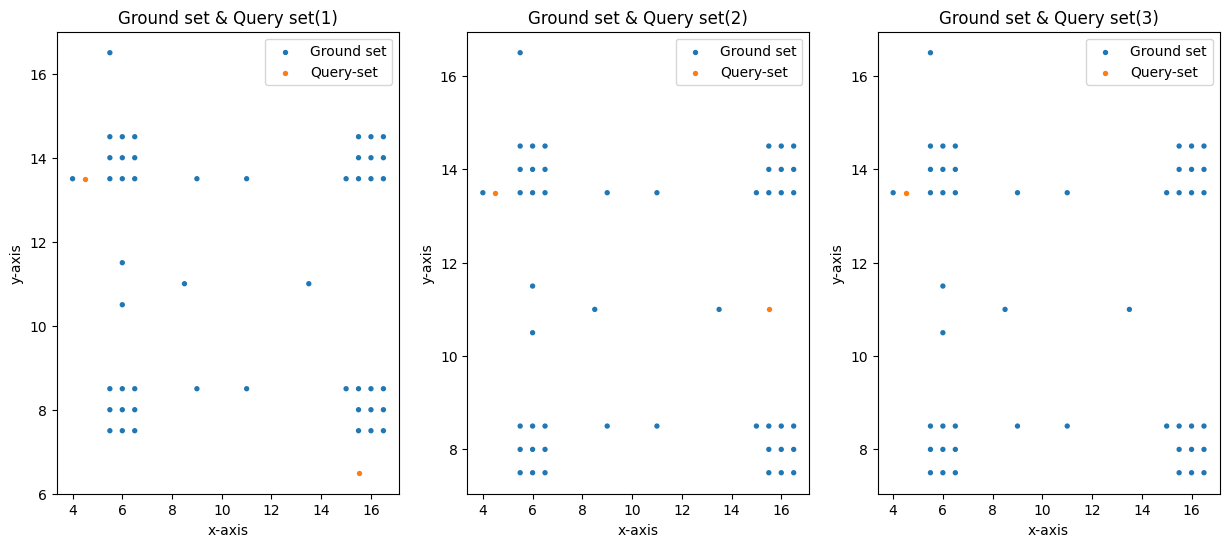

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(6)

ax[0].scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
ax[0].scatter(np.array(queries[0])[:,0], np.array(queries[0])[:,1], s=8)
ax[0].set_xlabel("x-axis")
ax[0].set_ylabel("y-axis")
ax[0].set_title("Ground set & Query set(1)")
ax[0].legend(["Ground set", "Query-set"])

ax[1].scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
ax[1].scatter(np.array(queries[1])[:,0], np.array(queries[1])[:,1], s=8)
ax[1].set_xlabel("x-axis")
ax[1].set_ylabel("y-axis")
ax[1].set_title("Ground set & Query set(2)")
ax[1].legend(["Ground set", "Query-set"])

ax[2].scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
ax[2].scatter(np.array(queries[2])[:,0], np.array(queries[2])[:,1], s=8)
ax[2].set_xlabel("x-axis")
ax[2].set_ylabel("y-axis")
ax[2].set_title("Ground set & Query set(3)")
ax[2].legend(["Ground set", "Query-set"])

fig.savefig("ground_qset.png")
plt.show()
plt.clf()

#Logarithmic Determinant Mutual Information

In [ ]:
from submodlib import LogDeterminantMutualInformationFunction
greedyLists = []
for idx, query in enumerate(queries):
  obj = LogDeterminantMutualInformationFunction(n=len(groundData), num_queries=len(query), data=groundData, queryData=np.array(query), metric="euclidean",lambdaVal=1)
  greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
  greedyLists.append(greedyList)

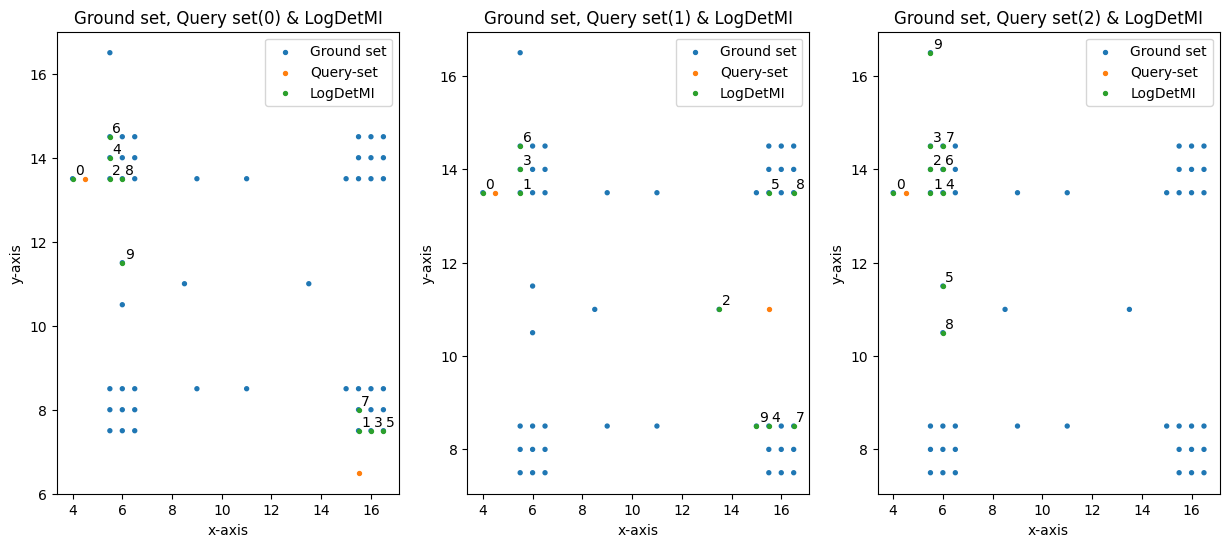

In [ ]:
fig, ax = plt.subplots(1,len(greedyLists))
fig.set_figwidth(15)
fig.set_figheight(6)

groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]

for i in range(len(ax)):
  greedyList = greedyLists[i]
  greedyXs = [groundData[x[0]][0] for x in greedyList]
  greedyYs = [groundData[x[0]][1] for x in greedyList]
  ax[i].scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
  ax[i].scatter(np.array(queries[i])[:,0], np.array(queries[i])[:,1], s=8)
  ax[i].scatter(greedyXs, greedyYs, s=8)
  ax[i].set_xlabel("x-axis")
  ax[i].set_ylabel("y-axis")
  ax[i].set_title(f"Ground set, Query set({i}) & LogDetMI")
  for label, element in enumerate(greedyList):
        ax[i].annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
  ax[i].legend(["Ground set", "Query-set", "LogDetMI"])

fig.savefig("LogDetMI.png")
plt.show()

#Concave Over Modular MI

In [ ]:
from submodlib import ConcaveOverModularFunction
from submodlib_cpp import ConcaveOverModular

greedyLists =[]
for idx, query in enumerate(queries):
  obj = ConcaveOverModularFunction(n=len(groundData), num_queries=len(query), data=groundData, queryData=np.array(query), metric="euclidean")
  greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
  greedyLists.append(greedyList)

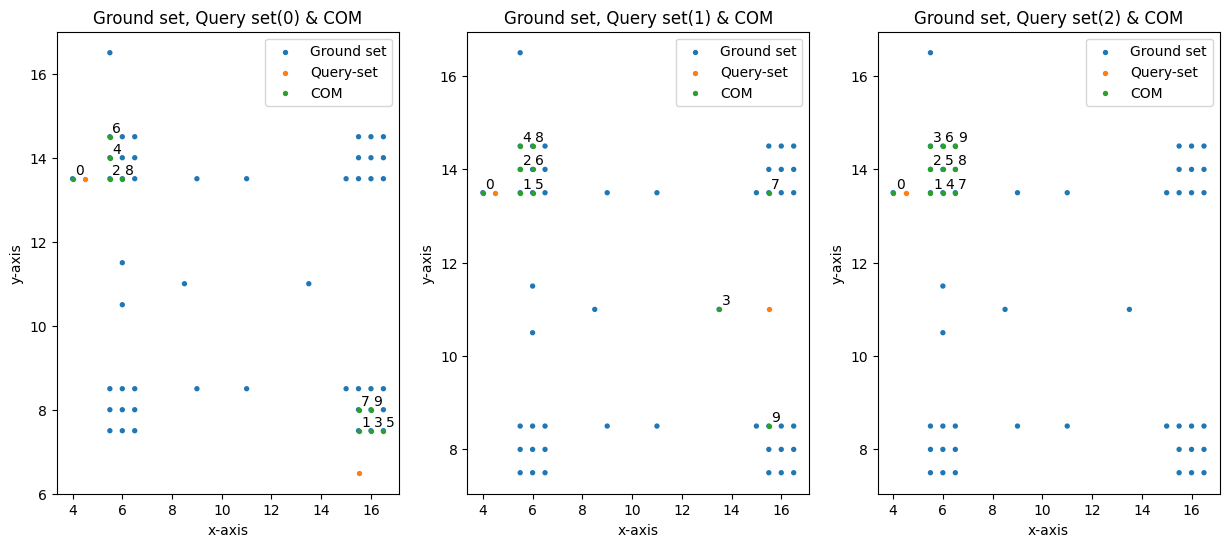

In [ ]:
fig, ax = plt.subplots(1,len(greedyLists))
fig.set_figwidth(15)
fig.set_figheight(6)

groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]

for i in range(len(ax)):
  greedyList = greedyLists[i]
  greedyXs = [groundData[x[0]][0] for x in greedyList]
  greedyYs = [groundData[x[0]][1] for x in greedyList]
  ax[i].scatter(groundData[:,0], groundData[:,1], s=[8]*len(groundData))
  ax[i].scatter(np.array(queries[i])[:,0], np.array(queries[i])[:,1], s=8)
  ax[i].scatter(greedyXs, greedyYs, s=8)
  ax[i].set_xlabel("x-axis")
  ax[i].set_ylabel("y-axis")
  ax[i].set_title(f"Ground set, Query set({i}) & COM")
  for label, element in enumerate(greedyList):
        ax[i].annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
  ax[i].legend(["Ground set", "Query-set", "COM"])

fig.savefig("ConcaveOverModular.png")
plt.show()